### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data Frame

In [2]:
df = pd.read_csv('heart_attack_predictions.csv')

In [3]:
df.head()

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,None,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,None,Low,Died


### Performing EDA And Data Cleaning

In [4]:
list(df.columns)

['Country',
 'Age',
 'Gender',
 'Cholesterol_Level',
 'Blood_Pressure',
 'Smoking_History',
 'Alcohol_Consumption',
 'Physical_Activity',
 'Obesity',
 'Diabetes',
 'Family_History',
 'Stress_Levels',
 'Dietary_Habits',
 'Heart_Attack_History',
 'Chest_Pain',
 'Exercise_Induced_Angina',
 'Resting_ECG',
 'Max_Heart_Rate_Achieved',
 'Thalassemia',
 'HDL_Cholesterol',
 'LDL_Cholesterol',
 'Triglycerides',
 'Heart_Disease_Risk',
 'Medication_Adherence',
 'Urbanization_Level',
 'Air_Pollution_Exposure',
 'Access_To_Healthcare',
 'Education_Level',
 'Income_Level',
 'Heart_Attack_Outcome']

In [5]:
df.shape

(623027, 30)

##### Data Frame has total 620K rows

###### Target varible was  "Heart_Attack_Outcome" we have to predict peoples survived or died based on the give features

In [6]:
##### 

In [7]:
df['Country'].unique()

array(['Germany', 'Egypt', 'Spain', 'Canada', 'France', 'Pakistan',
       'Nigeria', 'Vietnam', 'Philippines', 'Brazil', 'China',
       'Bangladesh', 'India', 'South Africa', 'United Kingdom',
       'United States', 'South Korea', 'Turkey', 'Australia', 'Indonesia',
       'Russia', 'Japan', 'Saudi Arabia', 'Italy', 'Mexico'], dtype=object)

In [8]:
df['Country'].nunique()

25

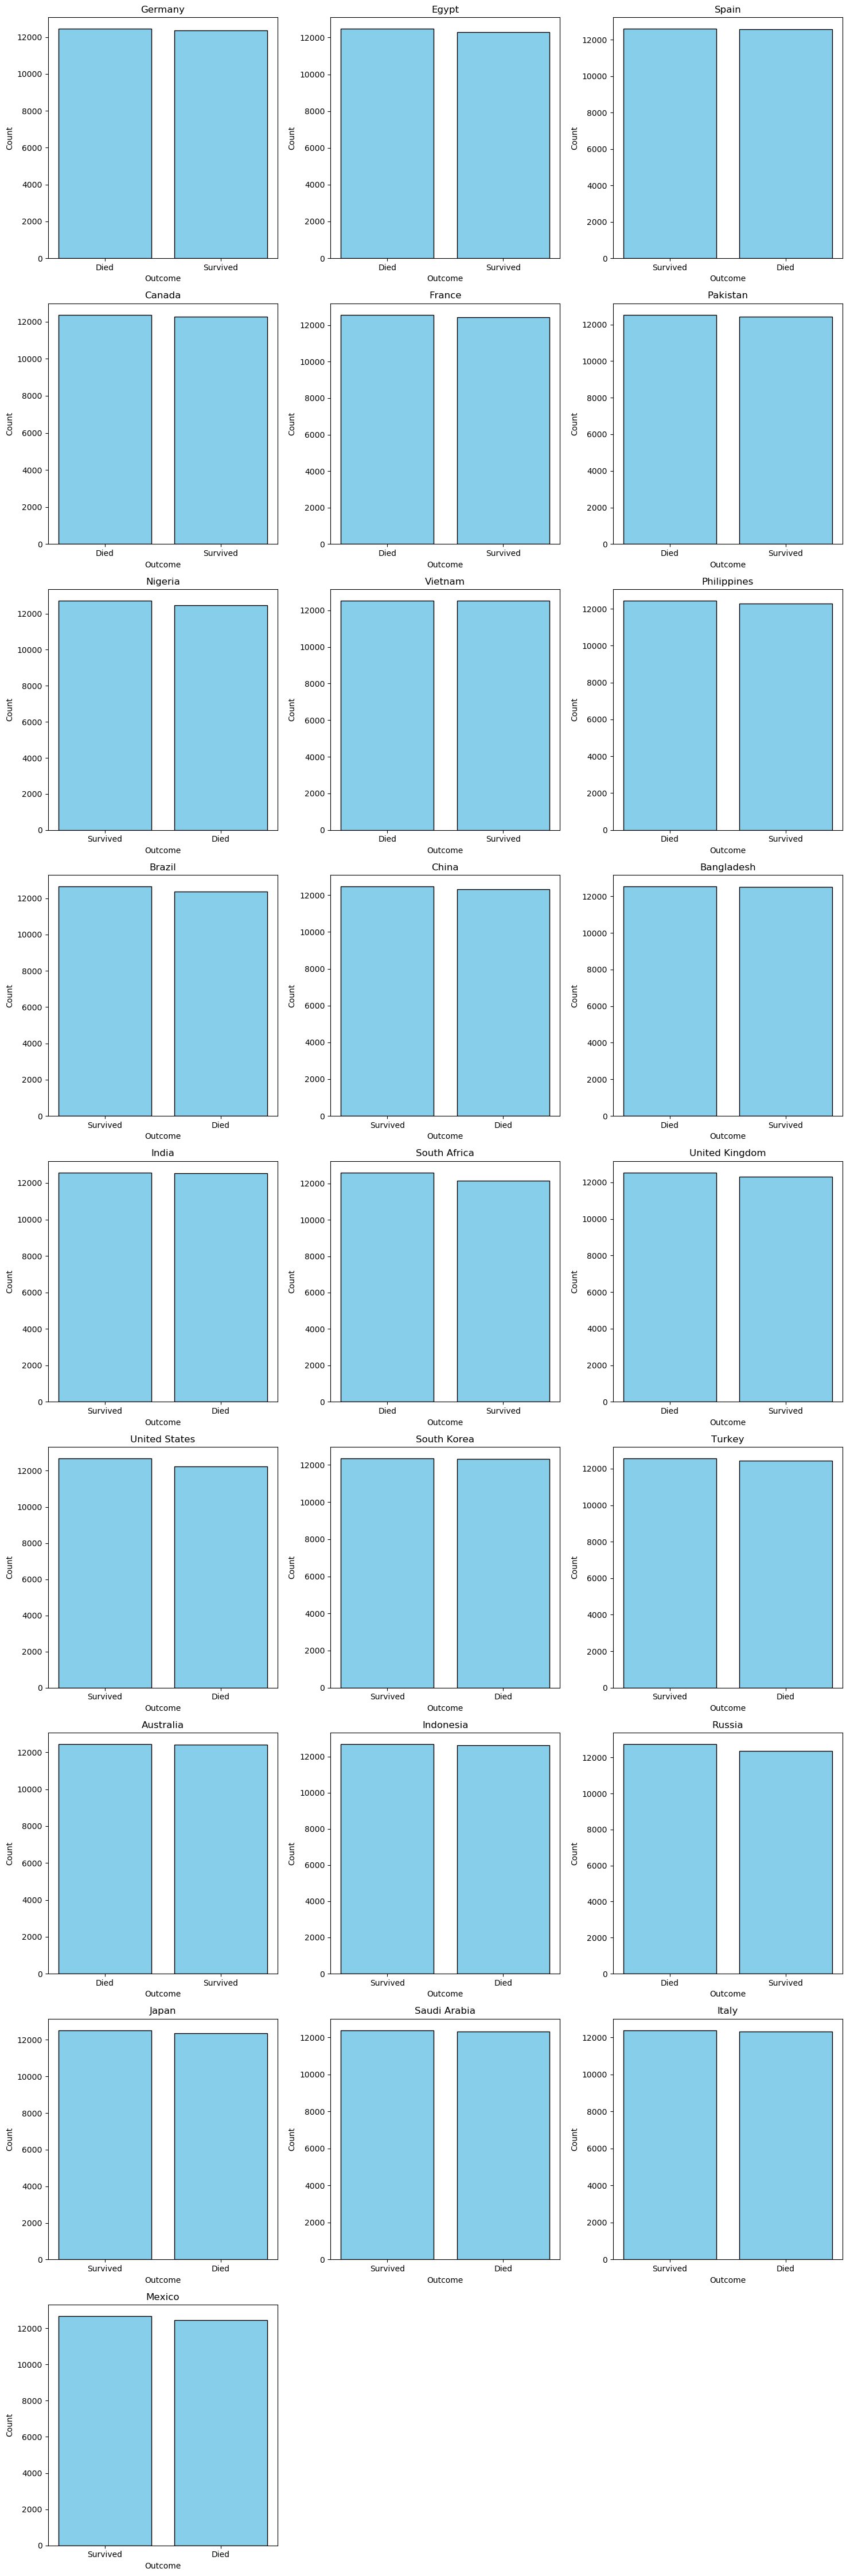

In [9]:
import matplotlib.pyplot as plt

# Get unique countries
unique_countries = df['Country'].unique()

# Determine the number of rows and columns
cols = 3
rows = -(-len(unique_countries) // cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()
# Iterate over unique countries and axes
for ax, country in zip(axes, unique_countries):
    country_df = df[df['Country'] == country]
    # Example aggregation (e.g., count outcomes)
    aggregated_data = country_df['Heart_Attack_Outcome'].value_counts()
    
    # Plot the bar chart on the current axis
    ax.bar(aggregated_data.index, aggregated_data.values, color='skyblue', edgecolor='black')
    ax.set_title(country)
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Count')

# Turn off unused subplots
for i in range(len(unique_countries), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### Almost in each country survived and Died rate is similar

Text(0, 0.5, 'count of deaths')

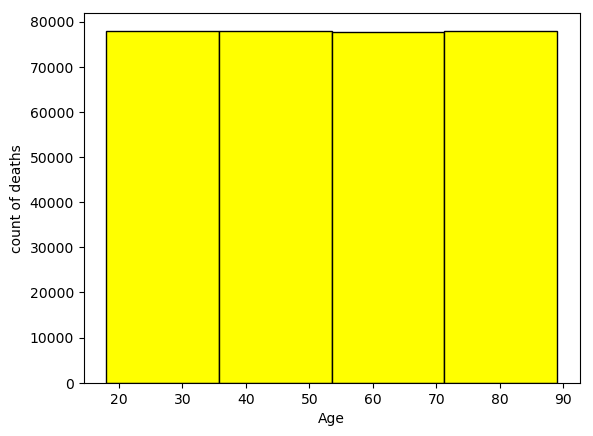

In [34]:
plt.hist(df[df['Heart_Attack_Outcome'] == 'Died']['Age'], bins=4, color='yellow', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count of deaths')

##### In this data death counts is similar across all age groups

In [ ]:
plt.hist(df['Max_Heart_Rate_Achieved'], bins=8, color='yellow', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count of deaths')

In [ ]:

# Define tolerance and number of bins for continuous data
tolerance = 1400
bins = 10

# Function to check if values in a column are "almost similar"
def check_similarity(column, tolerance, bins):
    unique_values = column.unique()
    
    # Check if the column is continuous or categorical
    if column.dtypes in ['float64', 'int64'] and len(unique_values) > 10:  # Assuming >10 unique values implies continuous
        # Use binning for continuous data
        binned = pd.cut(column, bins=bins)
        counts = binned.value_counts()
    else:
        # Use unique value counts for categorical data
        counts = column.value_counts()
    
    # Calculate the maximum and minimum counts
    max_count = counts.max()
    min_count = counts.min()
    # Check if the difference is within the tolerance
    return (max_count - min_count) <= tolerance

# Check similarity for each column
for col in df.columns:
    is_similar = check_similarity(df[col], tolerance, bins)
    print(f"Column Frequency '{col}' is {'similar' if is_similar else 'not similar'}.")


### This is a Balanced Dataset
#### In each column frequency of the values are equal so this is a balanced dataset

In [ ]:
df.info()

### There is no null values in dataset

In [11]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object' and col != '':
        cat_cols.append(col)
        

### Performing One Hot-Encoding to convert categorical columns into numerical 

In [31]:
one_hot_encoding = pd.get_dummies(df, cat_cols, drop_first=True)

## Model Building Using ML Algorithms

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
train, test = train_test_split(one_hot_encoding, test_size = 0.3, random_state = 23)

### For identifying the best model we further divided test data into 3 parts test, test_1 and test_2

In [48]:
test_1 = test.tail(8000)
test_2 = test_1.tail(4000)

In [46]:
test_1.head()

,Age,Cholesterol_Level,Blood_Pressure,Alcohol_Consumption,Stress_Levels,Max_Heart_Rate_Achieved,HDL_Cholesterol,LDL_Cholesterol,Triglycerides,Air_Pollution_Exposure,...,Urbanization_Level_Suburban,Urbanization_Level_Urban,Access_To_Healthcare_Good,Access_To_Healthcare_Poor,Education_Level_Primary,Education_Level_Secondary,Education_Level_Tertiary,Income_Level_Low,Income_Level_Medium,Heart_Attack_Outcome_Survived
464084,22,284.732826,148.898522,2.194965,9.562794,94,58.274092,128.901407,198.235373,20.808049,...,1,0,1,0,0,1,0,0,0,1
333729,67,192.378733,153.458368,4.934066,3.888191,64,53.806905,64.159920,269.687462,43.125563,...,0,0,0,1,0,0,1,1,0,0
253178,65,243.541832,89.803697,6.912986,5.767376,94,78.018406,67.838350,105.821944,20.297820,...,0,0,1,0,0,1,0,0,1,1
504628,62,226.833406,139.803220,7.883893,2.872753,102,54.480418,157.234656,160.160786,73.583392,...,0,1,0,1,1,0,0,1,0,1
190520,85,218.131973,121.144011,8.352820,4.044218,128,52.617893,181.706091,163.078275,92.971736,...,1,0,0,0,1,0,0,1,0,1


In [49]:
test_2.head()

,Age,Cholesterol_Level,Blood_Pressure,Alcohol_Consumption,Stress_Levels,Max_Heart_Rate_Achieved,HDL_Cholesterol,LDL_Cholesterol,Triglycerides,Air_Pollution_Exposure,...,Urbanization_Level_Suburban,Urbanization_Level_Urban,Access_To_Healthcare_Good,Access_To_Healthcare_Poor,Education_Level_Primary,Education_Level_Secondary,Education_Level_Tertiary,Income_Level_Low,Income_Level_Medium,Heart_Attack_Outcome_Survived
202738,26,275.257537,96.953954,3.066466,3.445829,183,25.053618,51.469437,274.146066,61.188516,...,0,1,0,1,0,1,0,1,0,1
234545,73,186.400380,130.081002,2.761307,5.867015,154,67.166467,92.252041,413.013712,21.707125,...,0,0,0,0,1,0,0,0,1,0
23247,40,262.226005,99.292381,0.118344,7.963850,196,84.776063,163.674767,465.482361,16.376596,...,1,0,1,0,0,0,1,0,1,0
27276,21,294.909861,100.749107,2.691423,4.263124,199,28.031381,156.952500,437.340083,74.788385,...,0,0,0,0,0,0,0,1,0,0
95691,27,163.575933,107.414084,0.449151,4.149265,167,81.497163,139.678773,292.668008,65.435845,...,0,0,0,1,0,0,0,0,1,1


In [125]:
X_train = train.drop(['Heart_Attack_Outcome_Survived'],axis = 1)
y_train = train['Heart_Attack_Outcome_Survived']
X_test = test.drop(['Heart_Attack_Outcome_Survived'],axis = 1) 
y_test = test['Heart_Attack_Outcome_Survived']
X_test_1 = test_1.drop(['Heart_Attack_Outcome_Survived'],axis = 1) 
y_test_1 = test_1['Heart_Attack_Outcome_Survived']
X_test_2 = test_2.drop(['Heart_Attack_Outcome_Survived'],axis = 1) 
y_test_2 = test_2['Heart_Attack_Outcome_Survived']

In [58]:
def evaluate_model(true, predicted):
    accuracyscore = accuracy_score(true, predicted)
    return accuracyscore

In [61]:
model_list = []
accuracy_list_train = []
accuracy_list_test = []
accuracy_list_future_1 = []
accuracy_list_future_2 = []
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_1 = model.predict(X_test_1)
    y_test_pred_2 = model.predict(X_test_2)
    # Evaluate Train and Test dataset
    model_train_accuracy_score = evaluate_model(y_train, y_train_pred)
    model_test_accuracy_score  = evaluate_model(y_test, y_test_pred)
    model_test_1_accuracy_score = evaluate_model(y_test_1, y_test_pred_1)
    model_test_2_accuracy_score = evaluate_model(y_test_2, y_test_pred_2)
    
    print(model)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Train accuracy: {:.4f}".format(model_train_accuracy_score))


    print('---------------------------')
    print('Model performance for Test set')
    print("- Test accuracy: {:.4f}".format(model_test_accuracy_score))
    print("- Test accuracy: {:.4f}".format(model_test_1_accuracy_score))
    print("- Test accuracy: {:.4f}".format(model_test_2_accuracy_score))
    accuracy_list_train.append(model_train_accuracy_score)
    accuracy_list_test.append(model_test_accuracy_score)
    accuracy_list_future_1.append(model_test_1_accuracy_score)
    accuracy_list_future_2.append(model_test_2_accuracy_score)
    
    print('='*35)
    print('\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Decision Tree
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 0.4978
- Test accuracy: 0.4971
- Test accuracy: 0.4955




C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Random Forest Classifier
Model performance for Training set
- Train accuracy: 0.9865
---------------------------
Model performance for Test set
- Test accuracy: 0.5020
- Test accuracy: 0.4963
- Test accuracy: 0.4955




C:\Users\ramac\anaconda3\anaconda\anaconda\envs\pytorchenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Logistic Regression
Model performance for Training set
- Train accuracy: 0.5055
---------------------------
Model performance for Test set
- Test accuracy: 0.5009
- Test accuracy: 0.5100
- Test accuracy: 0.5050




### Building Model using ANN(Artificial Neural Networks)

In [126]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [127]:
len(X_train.columns)

62

In [128]:
class ann_model(nn.Module):
    def __init__ (self, features,h1,h2,h3,out_layer):
        super(ann_model,self).__init__()
        self.fc1 = nn.Linear(features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, out_layer)
        
    def feed_forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        
        return X

In [129]:
torch.manual_seed(23)
model = ann_model(62, 150, 100, 50, 2)

In [130]:
criterion = nn.CrossEntropyLoss()
optimzer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [131]:
X_train = torch.tensor(X_train.values, dtype = torch.float32)
X_test = torch.tensor(X_test.values, dtype = torch.float32)
X_test_1 = torch.tensor(X_test_1.values, dtype = torch.float32)
X_test_2 = torch.tensor(X_test_2.values, dtype = torch.float32)

y_train = torch.tensor(y_train.values, dtype = torch.int64)

y_test = torch.tensor(y_test.values, dtype = torch.int64)

y_test_1 = torch.tensor(y_test_1.values, dtype = torch.int64)

y_test_2 = torch.tensor(y_test_2.values, dtype = torch.int64)


In [132]:
epochs = 500
losses = []

for epoch in range(epochs):
    # Forward pass: Get raw logits
    y_pred = model.feed_forward(X_train)
    
    # Compute loss (use raw logits and full label tensor)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())  # Store loss for tracking
    
    # Backpropagation and optimization
    optimzer.zero_grad()  # Clear gradients
    loss.backward()       # Backpropagate
    optimzer.step()       # Update weights
    
    # Logging
    if epoch % 50 == 0:
        print(f"Epoch {epoch+1} -- Loss: {loss.item():.4f}")


Epoch 1 -- Loss: 2.3921
Epoch 51 -- Loss: 0.6976
Epoch 101 -- Loss: 0.6937
Epoch 151 -- Loss: 0.6933
Epoch 201 -- Loss: 0.6931
Epoch 251 -- Loss: 0.6929
Epoch 301 -- Loss: 0.6928
Epoch 351 -- Loss: 0.6927
Epoch 401 -- Loss: 0.6925
Epoch 451 -- Loss: 0.6924


In [133]:
import matplotlib.pyplot as plt

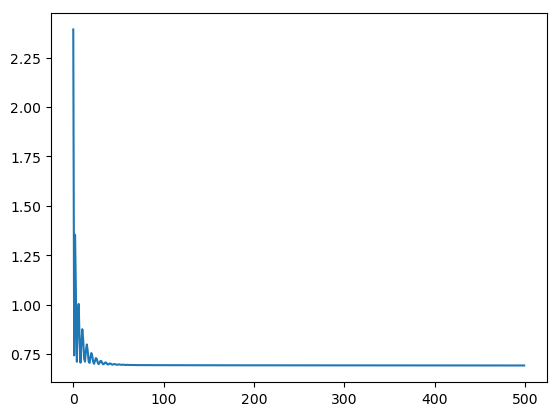

In [134]:
plt.plot(range(epochs), losses)

### ann_model testing on test data

In [149]:
val_1 = []

# Disable gradient calculation for evaluation
with torch.no_grad():
    y_val = model.feed_forward(X_test)  # Raw logits output
    val_1 = torch.argmax(y_val, dim=1)  # Get class predictions

# Convert val_1 and y_test to numpy arrays (if needed for accuracy_score)
val_1 = val_1.cpu().numpy() if isinstance(val_1, torch.Tensor) else val_1
y_test = y_test.cpu().numpy() if isinstance(y_test, torch.Tensor) else y_test

# Calculate accuracy using sklearn's accuracy_score
accuracy = accuracy_score(y_test, val_1)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 50.09%


In [150]:
val_2 = []

# Disable gradient calculation for evaluation
with torch.no_grad():
    y_val = model.feed_forward(X_train)  # Raw logits output
    val_1 = torch.argmax(y_val, dim=1)  # Get class predictions

# Convert val_1 and y_test to numpy arrays (if needed for accuracy_score)
val_1 = val_1.cpu().numpy() if isinstance(val_1, torch.Tensor) else val_1
y_test = y_train.cpu().numpy() if isinstance(y_train, torch.Tensor) else y_test

# Calculate accuracy using sklearn's accuracy_score
accuracy = accuracy_score(y_test, val_1)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 51.38%
